# Usage of contextplt
Contextplt is for writing matplotlib very simply using context manager. This package is a simple wrapper for matplotlib and calls various functions from parameters of context managers.

## Quickstart 
When two dimensional variables are visualized with customized settings, we often use object-based inference instead of pyplot interface like this. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

import contextplt as cplt
print(cplt.__version__)

0.2.9


In [2]:
x = np.random.random(size=100)
y = np.random.random(size=100)

Text(0.5, 1.0, 'title')

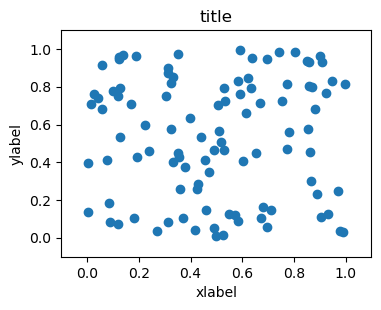

In [3]:
fig = plt.figure(figsize=(4,3), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(x,y)
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])
plt.title("title")

However, this object-based inference requires many lines and we should know many methods implemented in fig/axis object.   
contextplt wrap these process, and can achive the same results from parameters.

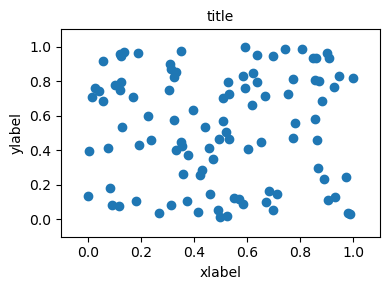

In [4]:
with cplt.Single(xlim=[-0.1,1.1], ylim=[-0.1,1.1], xlabel="xlabel", ylabel="ylabel",
        title="title", figsize=(4,3), dpi=100) as p:
    p.ax.scatter(x,y)

As you see, a variable returned from .\_\_enter\_\_() method contains fig and ax object.If you plot, use "p.ax" instead of ax.   
Noteworthy advandage of this approach is a usage of keyword arguments for plotting. 

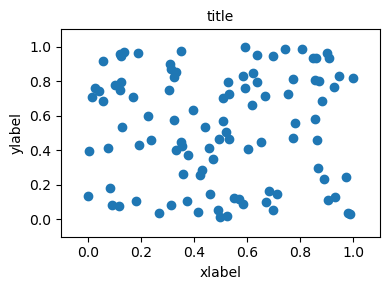

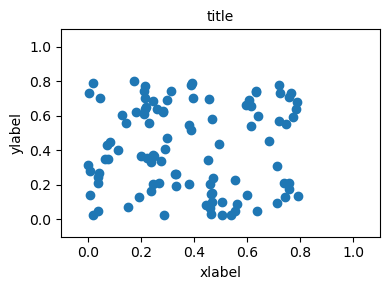

In [5]:
kargs = dict(xlim=[-0.1,1.1], ylim=[-0.1,1.1], xlabel="xlabel", ylabel="ylabel",
        title="title", figsize=(4,3), dpi=100)
with cplt.Single(**kargs) as p:
    p.ax.scatter(x,y)
    
x2 = np.random.random(size=100)*0.8
y2 = np.random.random(size=100)*0.8

with cplt.Single(**kargs) as p:
    p.ax.scatter(x2,y2)

This usage is helpful when figure setting are shared but variables are replaced with new ones. 

## Parameters for cplt.Single 
This section explains how to use parameters in cplt.Single. This is a full parameters currently impelemented in cplt.Single.

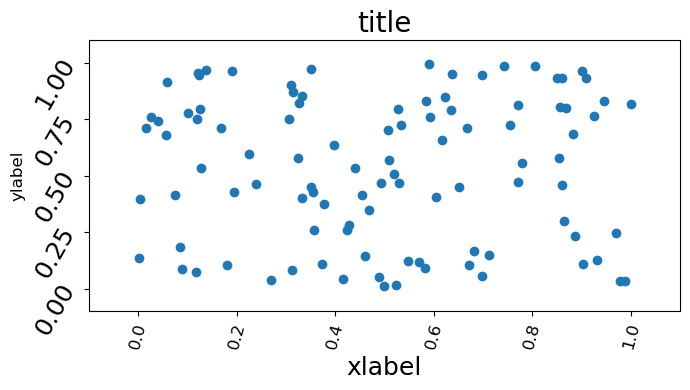

In [6]:
with cplt.Single(
    xlim=[-0.1,1.1], 
    ylim=[-0.1,1.1], 
    xlabel="xlabel", 
    ylabel="ylabel",
    xlabelfontsize=18,
    ylabelfontsize=12,
    xtickfontsize=12,
    ytickfontsize=18,
    title="title", 
    titlefontsize=20,
    tight=True,
    xrotation=75,
    yrotation=60,
    save_path="./test.png",
    savefig_kargs=dict(
        facecolor="white", bbox_inches="tight", 
    ),
    figsize=(7,4),
    dpi=100,
) as p:
    p.ax.scatter(x,y)

## Pandas integration
Since pandas' plot method accepts ax object, pass p.ax returned by context manager yield a customized figure. 

In [7]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [8]:
df = sm.datasets.get_rdataset("Melanoma", "MASS").data
df["sex"] = df["sex"].replace({0:"female", 1:"male"})
df_ht = pd.crosstab(df["year"], df["sex"])

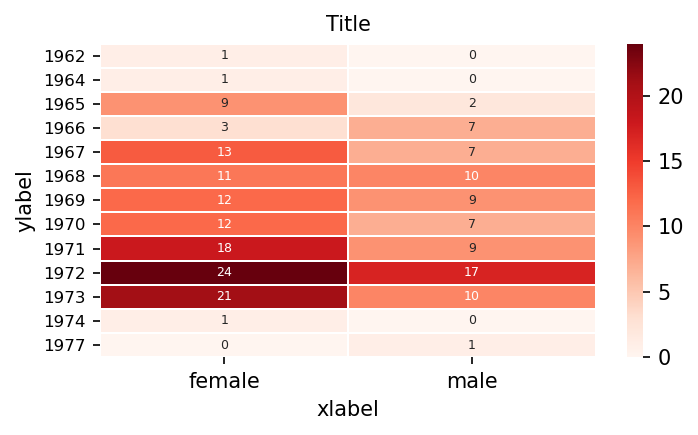

In [9]:
with cplt.Single(title="Title", xlabel="xlabel", ylabel="ylabel", ytickfontsize=8) as p:
    sns.heatmap(df_ht, cmap="Reds", fmt=".0f", ax=p.ax,
                        annot=True, linewidths=.2, annot_kws={"fontsize":6})

##  cplt.Multiple
To control multiple figures, we utilize context managers within context manger structure.   
Very basic usage of this class is as follows

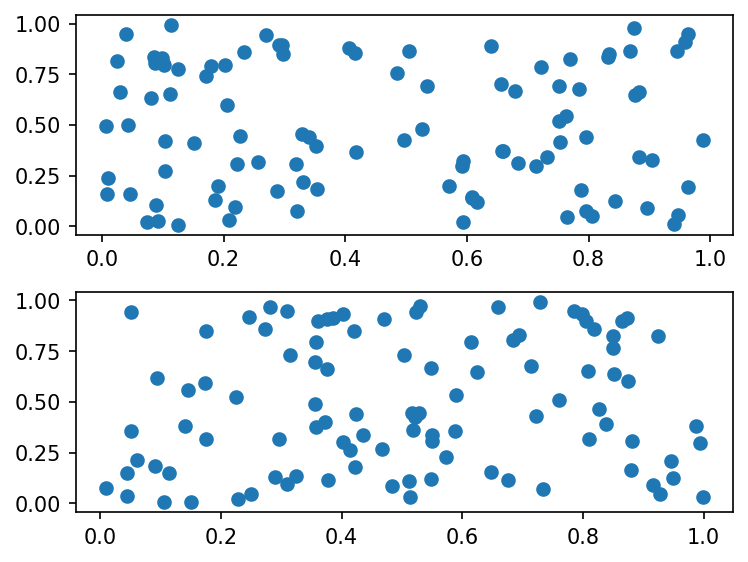

In [11]:
x1, x2, y1, y2= np.random.rand(4, 100)
with cplt.Multiple(grid=(2,1),figsize=(5,4), dpi=150) as mul:
    with mul.Single(index=1 ) as p:
        p.ax.scatter(x1,y1)
    with mul.Single(index=2,) as p:
        p.ax.scatter(x2,y2)

This type of writing is a bit redundant, but it gurantees all of your figures are correctly drawn. Same as cplt.Single, we can use various parameters to control figures.

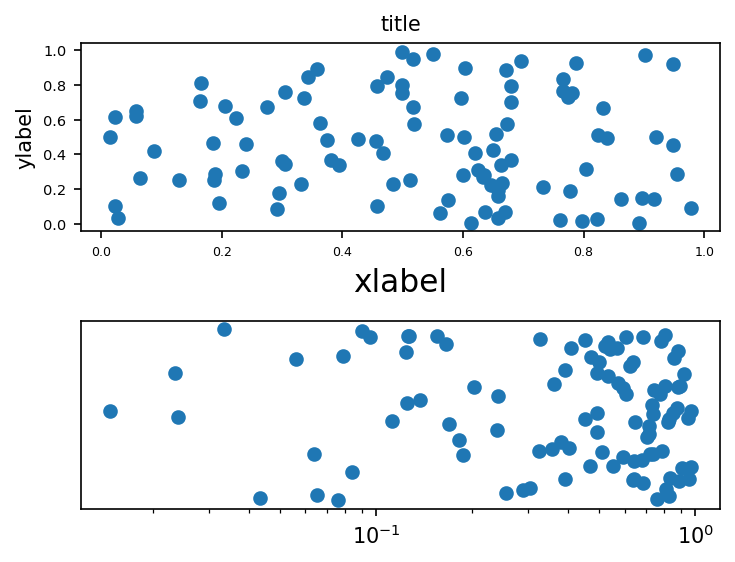

In [12]:
x1, x2, y1, y2= np.random.rand(4, 100)
with cplt.Multiple(grid=(2,1),figsize=(5,4), dpi=150) as mul:
    with mul.Single(index=1 , 
                        xlabel="xlabel", ylabel="ylabel", title="title",
                        xtickfontsize=6, ytickfontsize=7, xlabelfontsize=15) as p:
        p.ax.scatter(x1,y1)
    with mul.Single(index=2,xscale="log", yticks_show=False) as p:
        p.ax.scatter(x2,y2)

Also, sharex and sharey works as sharing x/y axis between figures. Since ax information is required when drawing next, names returned by context manger should be modified a little. 

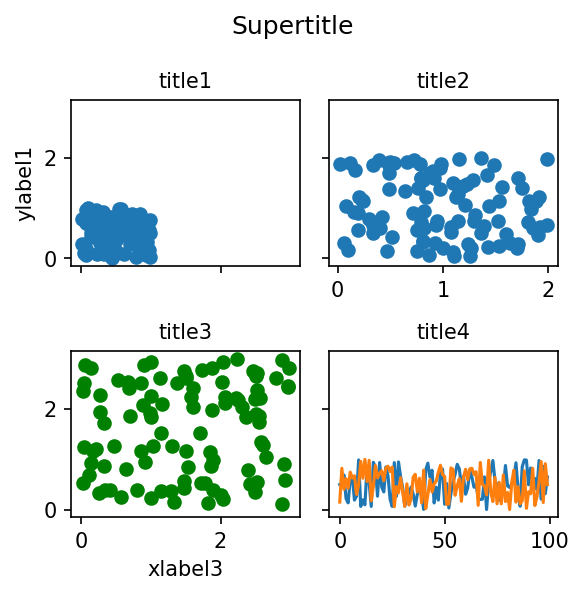

In [13]:
x1, y1 = np.random.rand(2,100)
x2, y2 = np.random.rand(2,100)*2
x3, y3 = np.random.rand(2,100)*3
df = pd.DataFrame(dict(x1=x1,y1=y1))
with cplt.Multiple(grid=(2,2),figsize=(4,4), dpi=150, suptitle="Supertitle", tight=True) as mul:
    with mul.Single(index=1, title="title1", xlabel="xlabel1", ylabel="ylabel1") as p1:
        p1.ax.scatter(x1,y1)
    with mul.Single(index=2, sharey=p1.ax,title="title2") as p2:
        p2.ax.scatter(x2,y2)
    with mul.Single(index=3, sharex=p1.ax, sharey=p1.ax, title="title3", xlabel="xlabel3") as p3:
        p3.ax.scatter(x3,y3, color="green")
    with mul.Single(index=4, sharey=p1.ax, title="title4") as p4:
        df.plot(ax=p4.ax)
        p4.ax.get_legend().set_visible(False)


"label_outer" parameter leaves all of the outer information and remove all the inner labels and ticks. Be careful when using it because it also removes inner ticks although ticks are even not shared correctly.  

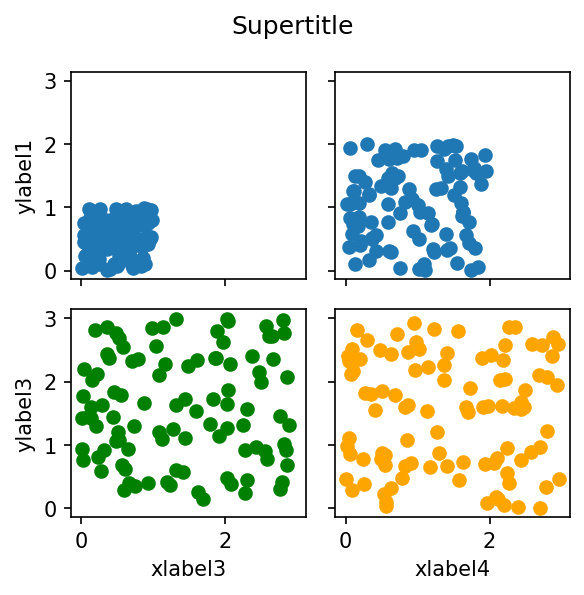

In [14]:
x1, y1 = np.random.rand(2,100)
x2, y2 = np.random.rand(2,100)*2
x3, y3 = np.random.rand(2,100)*3
x4, y4 = np.random.rand(2,100)*3
with cplt.Multiple(grid=(2,2),figsize=(4,4), dpi=150, suptitle="Supertitle", tight=True, label_outer=True) as mul:
    with mul.Single(index=1, ylabel="ylabel1", ) as p1:
        p1.ax.scatter(x1,y1)
    with mul.Single(index=2, sharex=p1.ax, sharey=p1.ax) as p2:
        p2.ax.scatter(x2,y2)
    with mul.Single(index=3, sharex=p1.ax, sharey=p1.ax, xlabel="xlabel3", ylabel="ylabel3") as p3:
        p3.ax.scatter(x3,y3, color="green")
    with mul.Single(index=4, sharex=p1.ax, sharey=p1.ax, xlabel="xlabel4") as p4:
        p4.ax.scatter(x4,y4, color="orange")
